In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
pi = np.pi

In [2]:
def make_image_stack(path):
    df = pd.read_csv(path)
    labels = df['label'].to_numpy()
    df.drop(df.columns[[0,1]], axis=1, inplace=True)
    img_stack = df.to_numpy()
    return img_stack, labels

In [3]:
def get_image_from_stack(index, img_stack, dim):
    img = img_stack[index]
    img = img.reshape(dim,dim)
    return img

In [4]:
def shift_img_phase(img, theta):
    # Compute the Fourier Transform
    f = np.fft.fft2(img)
    # Shift the zero frequency component to the center of the spectrum
    fshift = np.fft.fftshift(f)
    # Compute the magnitude and phase spectra
    magnitude_spectrum = np.abs(fshift)
    phase_spectrum = np.angle(fshift)
    
    # Modulate the phase spectrum and shift it by theta
    phase_shift = theta
    modulated_phase_spectrum = phase_spectrum + phase_shift
    combined_spectrum = magnitude_spectrum * np.exp(1j * modulated_phase_spectrum)
    
    # Get the shifted image by inverse Fourier Transform
    fshift_back = np.fft.ifftshift(combined_spectrum)
    shifted_img = np.fft.ifft2(fshift_back)
    
    # Normalize the image to 8-bit format for display
    shifted_img = cv2.normalize(np.real(shifted_img), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return shifted_img

In [5]:
def show_img(img):
    plt.imshow(img, cmap="gray")
    plt.show()    

In [6]:
def calc_intensity(img):
    # Compute the Fourier Transform
    f = np.fft.fft2(img)
    # Shift the zero frequency component to the center of the spectrum
    fshift = np.fft.fftshift(f)
    # Compute the magnitude and phase spectra
    magnitude_spectrum = np.abs(fshift)
    
    intensity_mean = (magnitude_spectrum.mean())/(magnitude_spectrum.max())
    return intensity_mean

In [7]:
#main

In [8]:
train_arr, labels = make_image_stack("mnist_train_cleaned.csv")

In [9]:
img = get_image_from_stack(0, train_arr, 28)

In [10]:
shifted_img = shift_img_phase(img, pi)

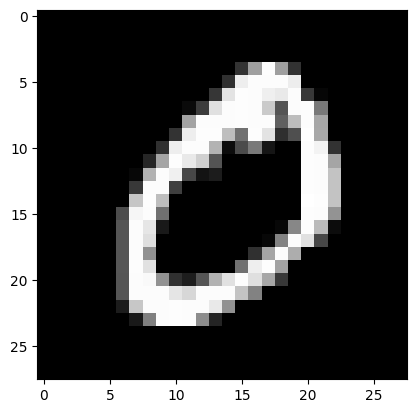

In [11]:
show_img(img)

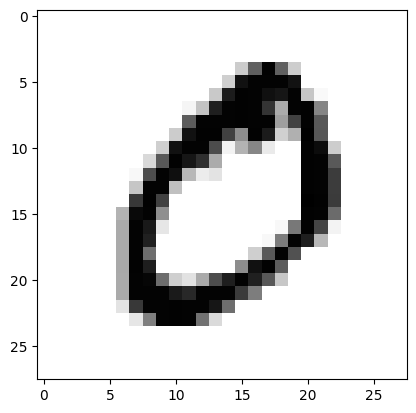

In [12]:
show_img(shifted_img)

In [13]:
calc_intensity(img)

0.04231744745885965

In [14]:
calc_intensity(shifted_img)

0.008834811486103386